This project is a face detection project using eigen-faces method.

In [1]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from skimage.transform import resize

filePath='ORL-DATABASE\\ORL-DATABASE\\'
HEIGHT=112
WIDTH=92
numberOfPeople=40
trainingFaceNo=5
totalFaceNo=10
testFaceNo=totalFaceNo-trainingFaceNo

In [2]:
#This function reads input and returns in 1d vector-face format
def read_pgm(filePath):
    pgmf=open(filePath,'rb') 
    """Return a raster of integers from a PGM as a list of lists."""
    assert pgmf.readline() == b'P5\n'
    (width, height) = [int(i) for i in pgmf.readline().split()]
    depth = int(pgmf.readline())
    assert depth <= 255

    raster = []
    for y in range(height):
        row = []
        for y in range(width):
            row.append(ord(pgmf.read(1)))
        raster.append(row)
    pgmf.close()
    return matrixToVector(np.array(raster))

def matrixToVector(matrix):
    vector=np.zeros(HEIGHT*WIDTH)
    for i in range(HEIGHT):
        vector[i*WIDTH:i*WIDTH+WIDTH]=matrix[i]
    return vector

def vectorToMatrix(vector):
    matrix=np.zeros(shape=(HEIGHT,WIDTH))
    for i in range(HEIGHT):
        matrix[i]=vector[i*WIDTH:i*WIDTH+WIDTH]
    return matrix

#Read training faces
def returnPersonFacesForTraining(filePath):
    personFaces=np.zeros(shape=(numberOfPeople,trainingFaceNo,HEIGHT*WIDTH))
    for i in range(numberOfPeople):
        for j in range(trainingFaceNo):
            personFaces[i][j]=read_pgm(filePath+"s"+str(i+1)+"\\"+str(j+1)+".pgm")
    return personFaces

#Read test faces
def returnPersonFacesForTest(filePath):
    personFaces=np.zeros(shape=(numberOfPeople,testFaceNo,HEIGHT*WIDTH))
    for i in range(numberOfPeople):
        for j in range(trainingFaceNo,totalFaceNo):
            personFaces[i][j-trainingFaceNo]=read_pgm(filePath+"s"+str(i+1)+"\\"+str(j+1)+".pgm")
    return personFaces

In [3]:
image=read_pgm(filePath+"s1\\1.pgm")

trainingFaces=returnPersonFacesForTraining(filePath)
testFaces=returnPersonFacesForTest(filePath)

print("Correctly Read?:",all(image==trainingFaces[0][0]))
print(trainingFaces.shape)
print(testFaces.shape)

Correctly Read?: True
(40, 5, 10304)
(40, 5, 10304)


In [4]:
averageFace=np.average(trainingFaces,axis=1)
averageFace=np.average(averageFace,axis=0)
print(averageFace.shape)
testForAverage=0
for i in range(0,numberOfPeople):
    for j in range(0,trainingFaceNo):
        testForAverage+=trainingFaces[i][j][7]
testForAverage=testForAverage/numberOfPeople/trainingFaceNo
print(averageFace.shape)
print(testForAverage)
print(averageFace[7])
print("AverageFace is correct?:",averageFace[7]==testForAverage)

(10304,)
(10304,)
85.13
85.13
AverageFace is correct?: True


Test image correctness by plotting:


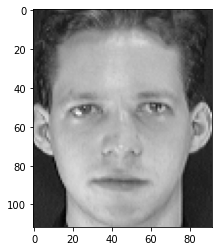

Average Face:


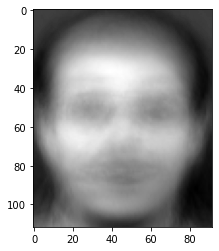

In [5]:
print("Test image correctness by plotting:")
plt.gray()
imgplot = plt.imshow(vectorToMatrix(image))
plt.show()

print("Average Face:")
imgplot = plt.imshow(vectorToMatrix(averageFace))
plt.show()


In [6]:
#Proper set of normalized vectors
normalizedFaces=np.zeros(shape=(numberOfPeople,trainingFaceNo,HEIGHT*WIDTH))

#This matrix is for generating covariance matrix
A=np.zeros(shape=(HEIGHT*WIDTH,numberOfPeople*trainingFaceNo))

for i in range(numberOfPeople):
    for j in range(trainingFaceNo):
        normalVector=trainingFaces[i][j]-averageFace
        normalizedFaces[i][j]=normalVector.copy()
        A[:,i*trainingFaceNo+j]=normalVector.copy()

print("A matrix is correct?:", all(A[:,0]==trainingFaces[0,0]-averageFace))

#A_T * A eigen value calculation is computationally much more easy instead of A * A_T
L=np.matmul(np.transpose(A),A)

print("Shape of A and L matrix:",A.shape, L.shape)

values , vectors = eig(L)
#Numpy gives eigen vectors in columns
vectors=np.transpose(vectors)
print("Shape of mapped eigenvalues and eigenVectors:",values.shape,vectors.shape)

#Map eigen vectors to our original domain
realVectors=np.zeros(shape=(vectors.shape[0],HEIGHT*WIDTH))
for i in range (vectors.shape[0]):
    realVectors[i]=np.matmul(A,vectors[i])

print("Shape of real EigenVectors:",realVectors.shape)

A matrix is correct?: True
Shape of A and L matrix: (10304, 200) (200, 200)
Shape of mapped eigenvalues and eigenVectors: (200,) (200, 200)
Shape of real EigenVectors: (200, 10304)


In [7]:
#Sort indices of eigenvalues in descending order
sortedIndices=(np.argsort((values)))[::-1]
print("Test if eigenValues are in descending order by printing:")

values[::-1].sort()
for i in range(10):
    print(values[i])


Test if eigenValues are in descending order by printing:
611718569.144305
407971438.62425685
232869909.46063468
184892954.02421468
168500897.72233295
108187995.0607017
87436709.31263937
84947610.78049454
68411527.27955344
58493788.48793818


In [8]:
baseEigenvectors=np.zeros(shape=(200,HEIGHT*WIDTH))
for i in range(baseEigenvectors.shape[0]):
    baseEigenvectors[i]=realVectors[sortedIndices[i]]/np.linalg.norm(realVectors[sortedIndices[i]])

print("Test if norm of vectors are 1:")    
print(np.linalg.norm(baseEigenvectors[11]))

Test if norm of vectors are 1:
1.0


Top 20 eigenFaces:


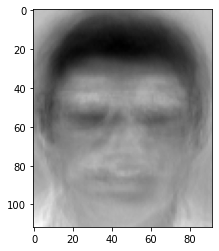

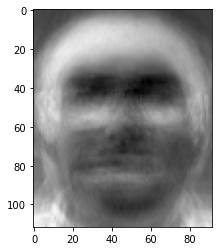

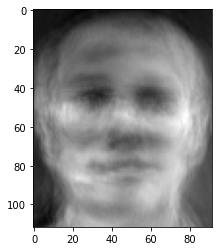

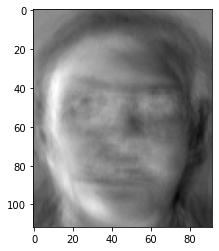

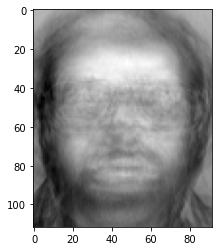

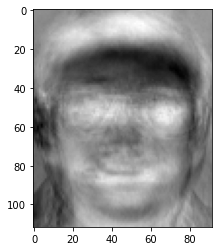

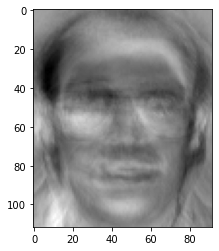

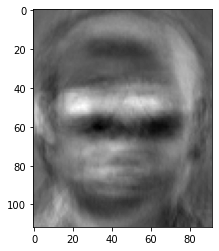

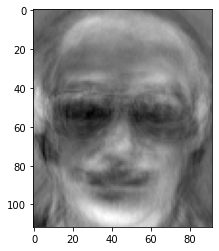

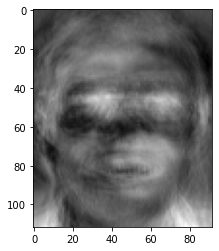

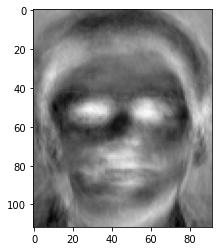

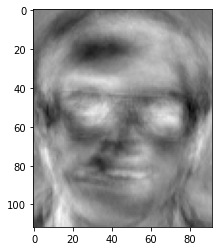

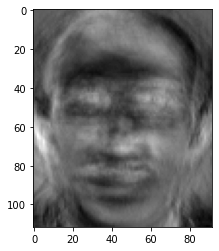

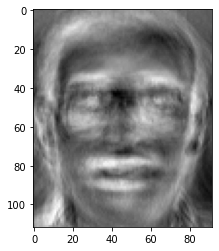

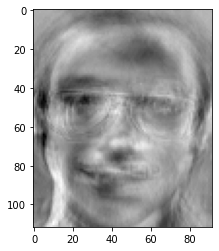

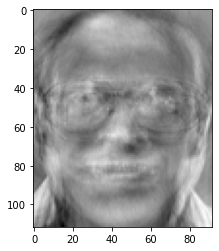

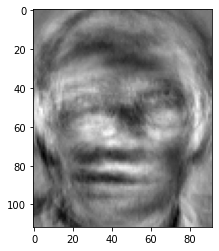

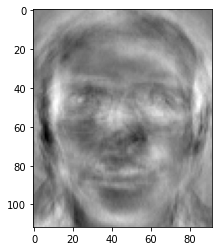

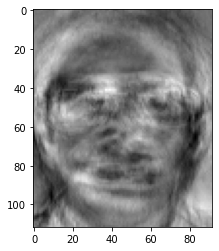

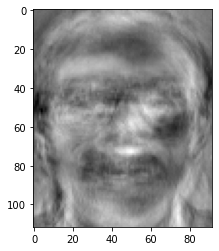

Average Face:


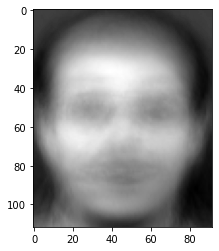

In [9]:
#Draw eigenfaces
print("Top 20 eigenFaces:")
for i in range(20):
    imgplot = plt.imshow(vectorToMatrix(baseEigenvectors[i]))
    plt.show()
#Draw average face
print("Average Face:")
imgplot = plt.imshow(vectorToMatrix(averageFace))
plt.show()


Reconstructions & original face:
Number Of Base Eigen Vectors: 1


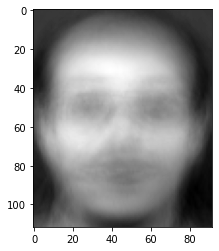

Number Of Base Eigen Vectors: 2


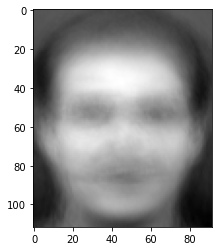

Number Of Base Eigen Vectors: 3


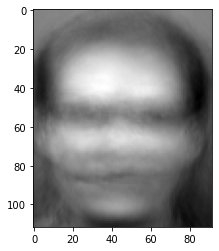

Number Of Base Eigen Vectors: 5


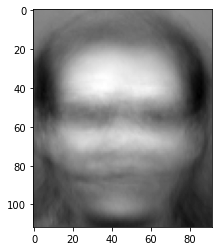

Number Of Base Eigen Vectors: 10


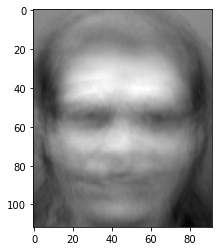

Number Of Base Eigen Vectors: 20


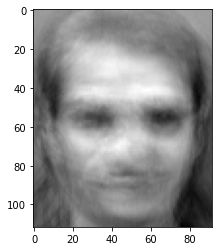

Number Of Base Eigen Vectors: 40


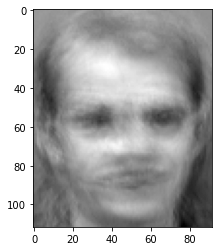

Number Of Base Eigen Vectors: 60


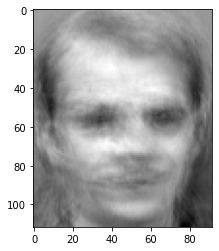

Number Of Base Eigen Vectors: 80


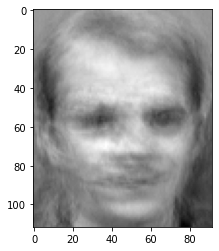

Number Of Base Eigen Vectors: 100


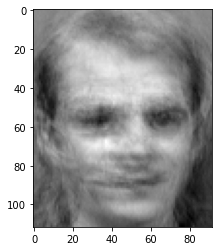

Number Of Base Eigen Vectors: 120


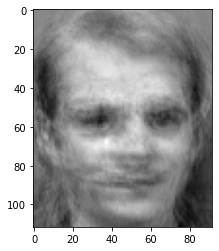

Number Of Base Eigen Vectors: 140


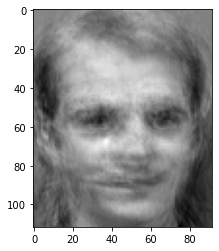

Number Of Base Eigen Vectors: 160


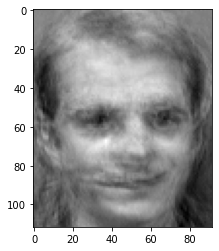

Number Of Base Eigen Vectors: 180


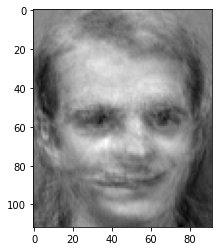

Number Of Base Eigen Vectors: 200


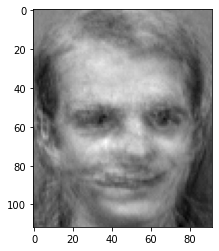

Original:


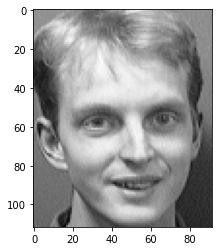

In [10]:
#Do reconstruction of an image on eigenvector base

print("Reconstructions & original face:")    

noOfBaseVectors=[1,2,3,5,10,20,40,60,80,100,120,140,160,180,200]
for noOfBase in noOfBaseVectors:
    reconstruction=averageFace.copy()
    for i in range(noOfBase):
        a_i=np.dot(testFaces[39,2]-averageFace,baseEigenvectors[i])
        a_i_Times_v_i=a_i*baseEigenvectors[i]
        reconstruction+=a_i_Times_v_i
    print("Number Of Base Eigen Vectors:",noOfBase)
    imgplot = plt.imshow(vectorToMatrix(reconstruction))
    plt.show()

print("Original:")
imgplot = plt.imshow(vectorToMatrix(testFaces[39,2]))
plt.show()

Check image shape, original, resized, 1d
(666, 594)
(112, 92)
(10304,)

Now try with a non human face, and see that it can not represent the face in 200 vector domain with human face training set
Reconstructions:
Number Of Base Eigen Vectors: 1


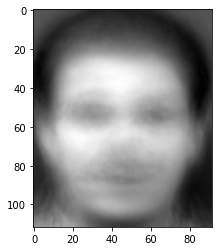

Number Of Base Eigen Vectors: 2


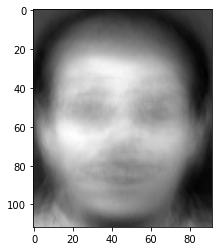

Number Of Base Eigen Vectors: 3


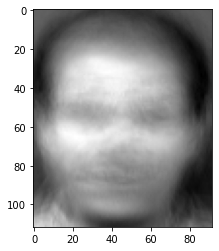

Number Of Base Eigen Vectors: 5


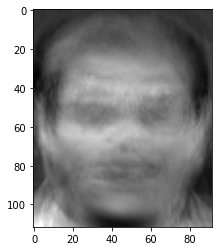

Number Of Base Eigen Vectors: 10


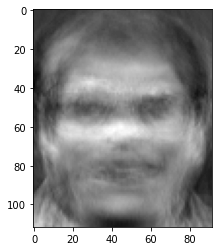

Number Of Base Eigen Vectors: 20


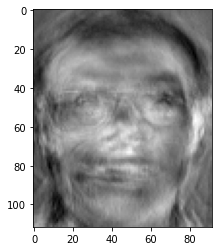

Number Of Base Eigen Vectors: 40


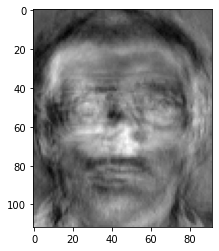

Number Of Base Eigen Vectors: 60


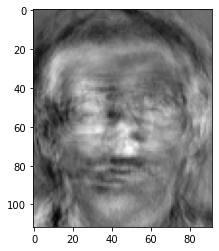

Number Of Base Eigen Vectors: 80


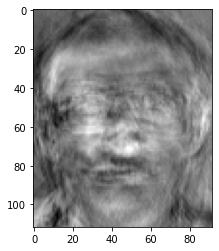

Number Of Base Eigen Vectors: 100


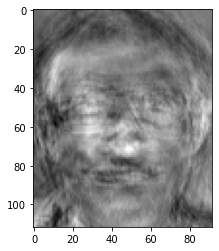

Number Of Base Eigen Vectors: 120


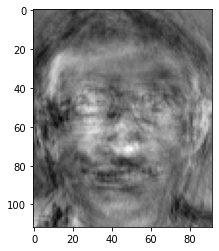

Number Of Base Eigen Vectors: 140


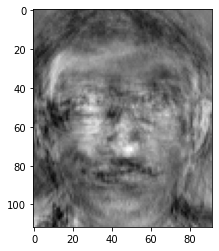

Number Of Base Eigen Vectors: 160


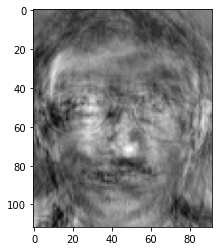

Number Of Base Eigen Vectors: 180


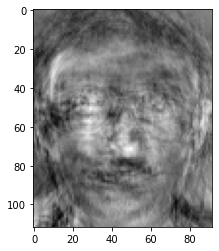

Number Of Base Eigen Vectors: 200


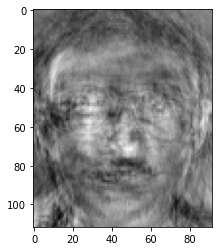

Original Face:


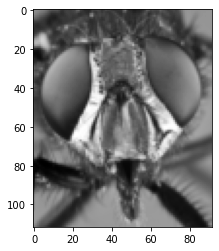

As we can see, since eigenfaces are not created from fly face dataset, they can not represent or reconstruct a fly face.


In [11]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('fly_face.jpg')     
gray = rgb2gray(img)    
size=(HEIGHT,WIDTH)
print("Check image shape, original, resized, 1d")
print(gray.shape)
fly = resize(gray, size)
print(fly.shape)
fly=matrixToVector(fly)
print(fly.shape)

print("\nNow try with a non human face, and see that it can not represent the face in 200 vector domain with human face training set")

#Do reconstruction of an image on eigenvector base
print("Reconstructions:")    

noOfBaseVectors=[1,2,3,5,10,20,40,60,80,100,120,140,160,180,200]
for noOfBase in noOfBaseVectors:
    reconstruction=averageFace.copy()
    for i in range(noOfBase):
        a_i=np.dot(fly-averageFace,baseEigenvectors[i])
        a_i_Times_v_i=a_i*baseEigenvectors[i]
        reconstruction+=a_i_Times_v_i
    print("Number Of Base Eigen Vectors:",noOfBase)
    imgplot = plt.imshow(vectorToMatrix(reconstruction))
    plt.show()

print("Original Face:")
imgplot = plt.imshow(vectorToMatrix(fly))
plt.show()

print("As we can see, since eigenfaces are not created from fly face dataset, they can not represent or reconstruct a fly face.")

In [12]:
#Mapping of images

def mapToEigenBase(eigenVectors,personFace):
    mappedVector=np.zeros(eigenVectors.shape[0])
    for i in range(eigenVectors.shape[0]):
        mappedVector[i]=np.dot(eigenVectors[i],(personFace-averageFace))
    return mappedVector

trainingFacesInEigenBase=np.zeros(shape=(numberOfPeople,trainingFaceNo,numberOfPeople*trainingFaceNo))
testFacesInEigenBase=np.zeros(shape=(numberOfPeople,trainingFaceNo,numberOfPeople*trainingFaceNo))

for i in range(numberOfPeople):
    for j in range(trainingFaceNo):
        trainingFacesInEigenBase[i,j]=mapToEigenBase(baseEigenvectors,trainingFaces[i,j])

for i in range(numberOfPeople):
    for j in range(testFaceNo):
        testFacesInEigenBase[i,j]=mapToEigenBase(baseEigenvectors,testFaces[i,j])

#Eigen Faces 		 Variance 		 Identification Rate(%)
-----------------------------------------------------------------
1 		 0.18844257362698494 		 11.5
2 		 0.31411995492374695 		 32.0
3 		 0.38585654634425853 		 55.00000000000001
5 		 0.49472106392826365 		 70.0
10 		 0.6202463256080798 		 84.00000000000001
20 		 0.7300305597961299 		 85.50000000000001
40 		 0.8289193370589556 		 88.5
60 		 0.8814395888291452 		 89.0
80 		 0.9156171254985004 		 89.49999999999999
100 		 0.9402591720324043 		 87.5
120 		 0.9589201481158888 		 88.5
140 		 0.9737987185148806 		 89.49999999999999
160 		 0.9853837693974886 		 89.49999999999999
180 		 0.9943152868942593 		 90.0
200 		 1.0 				 90.0


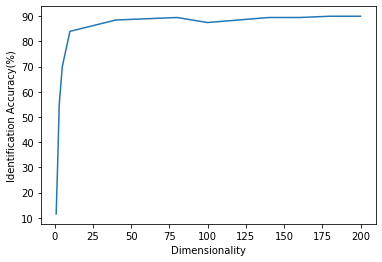

In [13]:
#Classification Of Test Images
#Closest face is selected as identification in eigenVector base domain
#Distance is euclidean metric
allVariances=[]
allIdentificationRate=[]
totalEigenValueSum=np.sum(values)
for noOfBase in noOfBaseVectors:
    currentEigenValueSum=np.sum(values[0:noOfBase])
    variance=currentEigenValueSum/totalEigenValueSum
    allVariances.append(variance)
    noOfTestedImage=numberOfPeople*(testFaceNo)
    correctlyClassified=0
    for i in range(numberOfPeople):
        for j in range(testFaceNo):
            #Euclidean difference in #noOfBase base
            euclideanDifferences=np.linalg.norm(trainingFacesInEigenBase[:,:,:noOfBase]-testFacesInEigenBase[i,j,:noOfBase],axis=2)
            indexes=np.where(euclideanDifferences==euclideanDifferences.min())
            personNo=indexes[0][0]
            photoNo=indexes[1][0]

            if i==personNo:
                correctlyClassified+=1
    allIdentificationRate.append(correctlyClassified/numberOfPeople/(testFaceNo)*100)

print("#Eigen Faces \t\t Variance \t\t Identification Rate(%)")
print("-----------------------------------------------------------------")
for i in range(len(noOfBaseVectors)):
    if(noOfBaseVectors[i]==200):
        print(noOfBaseVectors[i],"\t\t",allVariances[i],"\t\t\t\t",allIdentificationRate[i])
    else:
        print(noOfBaseVectors[i],"\t\t",allVariances[i],"\t\t",allIdentificationRate[i])
plt.plot(noOfBaseVectors,allIdentificationRate)
plt.xlabel("Dimensionality")
plt.ylabel("Identification Accuracy(%)")
plt.show()

Normalized Face:


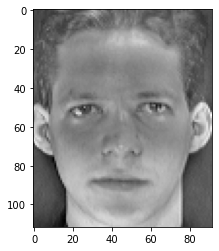

Original Face:


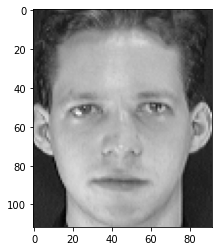

Average Face:


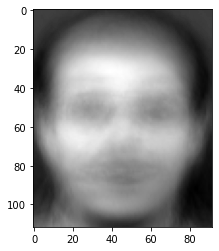

In [14]:
print("Normalized Face:")
imgplot = plt.imshow(vectorToMatrix(normalizedFaces[0,0]))
plt.show()

print("Original Face:")
imgplot = plt.imshow(vectorToMatrix(trainingFaces[0,0]))
plt.show()

print("Average Face:")
imgplot = plt.imshow(vectorToMatrix(averageFace))
plt.show()